# Introduction

This project looks at the relationship between trait emotional intelligence (TEI) and drug use (DUDIT), alcohol use (AUDIT), depression (PHQ-9) & anxiety (GAD-7). This project will focus on the four facets of TEI Wellbeing, Self_control, Emotionality and Sociability. The data was collected as part of my undergraduate dissertation. The data consists of 193 (125 female and 54 male) participants that were university students. It was hypothesised that participants with higher levels of TEI would score lower on each of the four variables.

The five variables used in this study were:

Patient Health Questionnaire [PHQ-9]
(https://www.integration.samhsa.gov/images/res/PHQ%20-%20Questions.pdf)

Generalized Anxiety Disorder 7-item [GAD-7]
(https://www.integration.samhsa.gov/clinical-practice/GAD708.19.08Cartwright.pdf)

Alcohol Use Disorders Identification Test [AUDIT]
(https://pubs.niaaa.nih.gov/publications/Audit.pdf)

Drug Use Disorders Identification Test [DUDIT]
(https://www.paihdelinkki.fi/sites/default/files/duditmanual.pdf)

Trait Emotional Intelligence Questionnaire – Short Form (TEIQue-SF) http://www.psychometriclab.com/adminsdata/files/The%20TEIQue-SF%20v.%201.50.pdf

In [ ]:
set.seed(101)

library(car)
library(ggplot2)
library(plyr)
library(dplyr)
library(MASS)
library(boot)
library(Hmisc)

In [2]:
tei <- read.csv("/home/james/Downloads/pycode/data1.csv", header=TRUE)
table(tei$Gender)

#Remove all the missing data
tei <- na.omit(tei)
table(tei$Gender)


female   male 
   132     61 


female   male 
   125     54 

Sum up each the variables to create the totals

In [3]:
tei$dudit <- rowSums(tei[,3:13])
tei$audit <- rowSums(tei[,14:23])
tei$gad <- rowSums(tei[,24:30])
tei$phq <- rowSums(tei[,31:39])
tei$tei <- rowSums(tei[,40:69])

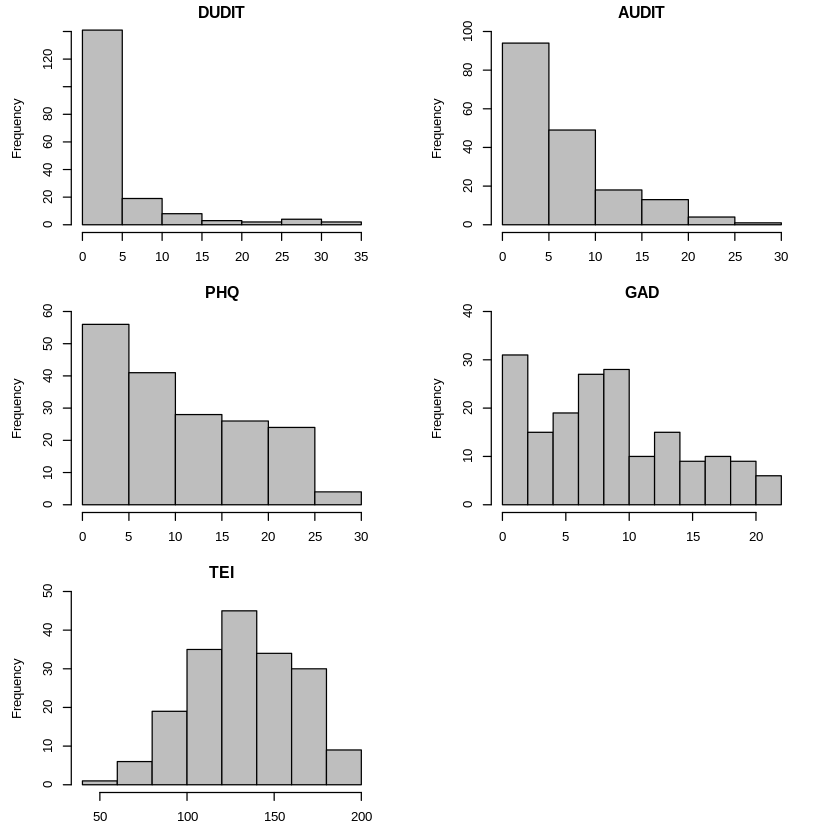

In [4]:
par(mfrow=c(3,2))
par(mar=c(3, 4.5, 1.5, 3))
hist(tei$dudit, col="grey", ylim= c(0, 140), main="DUDIT", xlab="DUDIT")
hist(tei$audit, col="grey", ylim= c(0, 100), main="AUDIT", xlab="AUDIT")
hist(tei$phq, col="grey", ylim= c(0, 60), main="PHQ", xlab="PHQ")
hist(tei$gad, col="grey", ylim= c(0, 40), main="GAD", xlab="GAD")
hist(tei$tei, col="grey", ylim= c(0, 50), main="TEI", xlab="TEI")

Look at the histograms to see the distribution. 

Four of these histograms have a positivity skew, which is common when studying this type of data,

In [5]:
mat <- tei[70:74]
names(mat)

[1] "dudit" "audit" "gad"   "phq"   "tei"

In [6]:
corstars <- function(x, type="spearman"){ 
require(Hmisc) 
x <- as.matrix(x) 
R <- rcorr(x, type="spearman")$r 
p <- rcorr(x, type="spearman")$P 

## define notions for significance levels; spacing is important.
mystars <- ifelse(p < .001, "***", ifelse(p < .01, "** ", ifelse(p < .05, "* ", " ")))

## trunctuate the matrix that holds the correlations to two decimal
R <- format(round(cbind(rep(-1.11, ncol(x)), R), 2))[,-1] 

## build a new matrix that includes the correlations with their apropriate stars 
Rnew <- matrix(paste(R, mystars, sep=""), ncol=ncol(x)) 
diag(Rnew) <- paste(diag(R), " ", sep="") 
rownames(Rnew) <- colnames(x) 
colnames(Rnew) <- paste(colnames(x), "", sep="") 

## remove upper triangle
Rnew <- as.matrix(Rnew)
Rnew[upper.tri(Rnew, diag = TRUE)] <- ""
Rnew <- as.data.frame(Rnew) 

## remove last column and return the matrix (which is now a data frame)
Rnew <- cbind(Rnew[1:length(Rnew)-1])
return(Rnew) 
}

corstars(mat)

,dudit,audit,gad,phq
dudit,,,,
audit,0.39***,,,
gad,0.17*,0.09,,
phq,0.30***,0.14,0.73***,
tei,-0.26***,-0.09,-0.62***,-0.70***


As the data for four of the variables are positively skewed a Spearman's rho correlation was carried out to look at the relationship between TEI total scores and DUDIT, AUDIT, GAD & PHQ, The correlations show that there is a significant relationship between DUDIT, GAD and PHQ, however, not for AUDIT. This suggests that participants that reported higher levels of TEI also reported lower levels of depression, anxiety and drug use. However, as causation cannot be established with a correlation it is unknown whether higher levels of TEI act as a protective factor against developing these problems or whether having lower levels of depression, anxiety and drug use lead to having higher TEI.

Therefore, to test this relationship regression was conducted. As the data for DUDIT, AUDIT, PHQ and GAD are positively skewed, Negative binomial regressions were carried out, as this demonstrated to be the best fit for the data (Neal & Simons, 2007). The incidence rate ratios (IRR) and significance are reported. IRR are the exponentiated regression coefficients (Cox & Bates, 2011) and can be interpreted as a one unit increase in the factors of the variable (predictor) represents an increase in TEIQUE-SF (outcome variable). If the IRR is less than one this represents a decrease in the outcome variable.

In [7]:
model1 <- glm.nb(tei ~ dudit + audit + phq + gad, data = tei)
summary(model1)
confint(model1)

model2 <- glm.nb(dudit ~ tei, data = tei)
summary(model2)
confint(model2)


Call:
glm.nb(formula = tei ~ dudit + audit + phq + gad, data = tei, 
    init.theta = 56.86293163, link = log)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.85495  -0.64783   0.08085   0.68324   2.73634  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.143759   0.025203 204.094  < 2e-16 ***
dudit       -0.002151   0.002110  -1.020  0.30789    
audit       -0.001441   0.002299  -0.627  0.53078    
phq         -0.014203   0.002535  -5.603  2.1e-08 ***
gad         -0.010018   0.003088  -3.244  0.00118 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(56.8629) family taken to be 1)

    Null deviance: 364.06  on 178  degrees of freedom
Residual deviance: 183.42  on 174  degrees of freedom
AIC: 1610.1

Number of Fisher Scoring iterations: 1


              Theta:  56.86 
          Std. Err.:  8.80 

 2 x log-likelihood:  -1598.086 

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),5.094444760,5.193234678
dudit,-0.006263600,0.001979743
audit,-0.005937788,0.003069393
phq,-0.019158221,-0.009246517
gad,-0.016125992,-0.003911134



Call:
glm.nb(formula = dudit ~ tei, data = tei, init.theta = 0.1515348203, 
    link = log)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.11864  -0.96751  -0.87082   0.06035   1.50828  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.339259   0.919135   3.633  0.00028 ***
tei         -0.017131   0.006772  -2.530  0.01142 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(0.1515) family taken to be 1)

    Null deviance: 133.44  on 178  degrees of freedom
Residual deviance: 126.25  on 177  degrees of freedom
AIC: 643.82

Number of Fisher Scoring iterations: 1


              Theta:  0.1515 
          Std. Err.:  0.0249 

 2 x log-likelihood:  -637.8210 

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),1.69602903,5.151505472
tei,-0.03000813,-0.004577054


Model 1 was used to predict what variables have a significant effect on predicting TEI. The model shows that PHQ  (IRR= -5.60, p<.001, 95% CI -0.01, -0.009) and GAD (IRR= -3.244, p=.001, 95% CI -0.01, -0.003) are significant predictors of TEI, whereas, DUDIT and AUDIT are not significant predictors. This would suggest that having lower levels of depression and anxiety may lead to higher levels of TEI. Whereas, drug use may have the opposite effect whereby drug use does not predict TEI but TEI predicts drug use and may act as a protective factor against drug use or increased levels of drug uses.

Model 2 shows that TEI does significantly predict drug use (IRR= -2.53, p=.01, 95% CI -0.03, -0.004). This suggests that higher levels of TEI may act as a protective factor against drug use.

The next part of this project is to examine the four facets of TEI, Well-being, Self-control, Emotionality and Sociability. First, these need to be added to create the totals for each of the four facets.

In [8]:
tei$Well_being <- tei$tei5 + tei$tei20 + tei$tei9 + tei$tei24 + tei$tei12 + tei$tei27
tei$Self_control <- tei$tei4 + tei$tei19 + tei$tei7 + tei$tei22 + tei$tei15 + tei$tei30
tei$Emotionality <- tei$tei1 + tei$tei16 + tei$tei2 + tei$tei17 + tei$tei8 + tei$tei23 + tei$tei13 + tei$tei28
tei$Sociability <- tei$tei6 + tei$tei21 + tei$tei10 + tei$tei25 + tei$tei11 + tei$tei26

names(tei)

[1] "Gender"       "Age"          "dudit1"       "dudit2"       "dudit3"      
 [6] "dudit4"       "dudit5"       "dudit6"       "dudit7"       "dudit8"      
[11] "dudit9"       "dudit10"      "dudit11"      "audit1"       "audit2"      
[16] "audit3"       "audit4"       "audit5"       "audit6"       "audit7"      
[21] "audit8"       "audit9"       "audit10"      "gad1"         "gad2"        
[26] "gad3"         "gad4"         "gad5"         "gad6"         "gad7"        
[31] "phq1"         "phq2"         "phq3"         "phq4"         "phq5"        
[36] "phq6"         "phq7"         "phq8"         "phq9"         "tei1"        
[41] "tei2"         "tei3"         "tei4"         "tei5"         "tei6"        
[46] "tei7"         "tei8"         "tei9"         "tei10"        "tei11"       
[51] "tei12"        "tei13"        "tei14"        "tei15"        "tei16"       
[56] "tei17"        "tei18"        "tei19"        "tei20"        "tei21"       
[61] "tei22"        "tei23"        "tei24"        "tei25"        "tei26"       
[66] "tei27"        "tei28"        "tei29"        "tei30"        "dudit"       
[71] "audit"        "gad"          "phq"          "tei"          "Well_being"  
[76] "Self_control" "Emotionality" "Sociability"

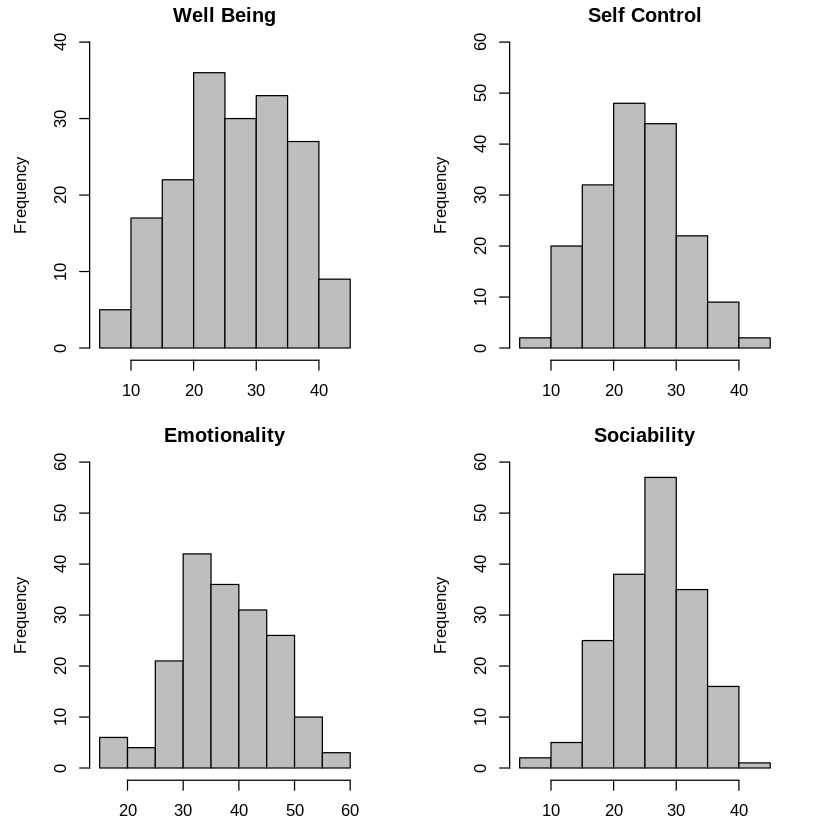

In [9]:
par(mfrow=c(2,2))
par(mar=c(3, 4.5, 1.5, 3))
hist(tei$Well_being, col="grey", ylim= c(0, 40), main="Well Being", xlab="Well Being")
hist(tei$Self_control, col="grey", ylim= c(0, 60), main="Self Control", xlab="Self Control")
hist(tei$Emotionality, col="grey", ylim= c(0, 60), main="Emotionality", xlab="Emotionality")
hist(tei$Sociability, col="grey", ylim= c(0, 60), main="Sociability", xlab="Sociability")

Each of the four facets of TEI will be used to predict each of the four variables in turn.

In [10]:
fitdudit <- lm(dudit ~ Well_being + Self_control + Emotionality + Sociability, data = tei)
summary(fitdudit)
confint(fitdudit)


Call:
lm(formula = dudit ~ Well_being + Self_control + Emotionality + 
    Sociability, data = tei)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0143 -3.4559 -1.6675  0.9722 28.2837 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.84571    2.49569   3.945 0.000116 ***
Well_being   -0.19242    0.07737  -2.487 0.013819 *  
Self_control -0.09747    0.09589  -1.016 0.310817    
Emotionality -0.08284    0.06882  -1.204 0.230299    
Sociability   0.15492    0.09671   1.602 0.110992    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.402 on 174 degrees of freedom
Multiple R-squared:  0.1025,	Adjusted R-squared:  0.08189 
F-statistic: 4.969 on 4 and 174 DF,  p-value: 0.0008117


,2.5 %,97.5 %
(Intercept),4.91999665,14.77142759
Well_being,-0.34511921,-0.03972461
Self_control,-0.28673739,0.09179132
Emotionality,-0.21866302,0.05298040
Sociability,-0.03595601,0.34579248


The model shows that Well_being (*b*=-0.19, *t*(174) = -2.48, *p* = .01) is a significant predictor for DUDIT, this is also supported by the 95% confidence interval (-0.34, -0.03) indicating that this variable is significant. There were no other significant predicts for dudit. Although, the data does suggest that there may be a relationship between drug use and sociability, although not significant in this model.

In [11]:
fitNB <- lm(audit ~ Well_being + Self_control + Emotionality + Sociability, data = tei)
summary(fitNB)
confint(fitNB)


Call:
lm(formula = audit ~ Well_being + Self_control + Emotionality + 
    Sociability, data = tei)

Residuals:
   Min     1Q Median     3Q    Max 
-9.750 -4.238 -1.123  2.655 16.101 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  11.46542    2.19852   5.215 5.17e-07 ***
Well_being    0.03432    0.06815   0.504   0.6152    
Self_control -0.17971    0.08448  -2.127   0.0348 *  
Emotionality -0.10078    0.06062  -1.662   0.0982 .  
Sociability   0.08994    0.08519   1.056   0.2926    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.64 on 174 degrees of freedom
Multiple R-squared:  0.05247,	Adjusted R-squared:  0.03069 
F-statistic: 2.409 on 4 and 174 DF,  p-value: 0.05116


,2.5 %,97.5 %
(Intercept),7.12622371,15.80461508
Well_being,-0.10019816,0.16883219
Self_control,-0.34643837,-0.01298222
Emotionality,-0.22042863,0.01886939
Sociability,-0.07821085,0.25808169


For alcohol use Self control was a significant (*b*= -0.17, *t*(174) = -2.12, *p*=.03, 95% CI -0.34, -0.01). This indicates that participants that had reported lower levels of self-control also reported higher levels of alcohol use. No other predictors were significant.

In [12]:
fitgad <- lm(gad ~  Well_being + Self_control + Emotionality + Sociability, data=tei)
summary(fitgad)
confint(fitgad)


Call:
lm(formula = gad ~ Well_being + Self_control + Emotionality + 
    Sociability, data = tei)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.4998  -2.6310   0.0938   2.8753  12.8349 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  21.69090    1.64401  13.194  < 2e-16 ***
Well_being   -0.27963    0.05096  -5.487 1.43e-07 ***
Self_control -0.32108    0.06317  -5.083 9.53e-07 ***
Emotionality  0.08064    0.04533   1.779    0.077 .  
Sociability  -0.01980    0.06371  -0.311    0.756    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.217 on 174 degrees of freedom
Multiple R-squared:  0.4958,	Adjusted R-squared:  0.4842 
F-statistic: 42.78 on 4 and 174 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),18.446128876,24.9356779
Well_being,-0.380217901,-0.1790417
Self_control,-0.445757256,-0.1964046
Emotionality,-0.008827275,0.1701156
Sociability,-0.145536068,0.1059376


The data for GAD show that Well being and Self-control were significant predictors of symptoms of anxiety. The model shows that individuals that reported higher levels of Wellbeing reported lower levels of anxiety (*b* = -0.27, *t*(174) = -5.48, *p* < .001, 95% CI -0.38, -0.17). The model also shows that Self-control is a significant predictor *b* = -.32, *t*(174) = -5.08, *p* < .001, 95% CI -0.44, -0.19), suggesting that participants that reported higher levels of self-control reported lower levels of anxiety.

In [13]:
fitphq <- lm(phq ~  Well_being + Self_control + Emotionality + Sociability, data=tei)
summary(fitphq)
confint(fitphq)


Call:
lm(formula = phq ~ Well_being + Self_control + Emotionality + 
    Sociability, data = tei)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.2479  -2.9102  -0.4218   2.7187  13.0511 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  28.23393    1.89552  14.895  < 2e-16 ***
Well_being   -0.52959    0.05876  -9.013 3.54e-16 ***
Self_control -0.24620    0.07283  -3.380 0.000894 ***
Emotionality  0.05987    0.05227   1.145 0.253622    
Sociability   0.03064    0.07345   0.417 0.677048    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.862 on 174 degrees of freedom
Multiple R-squared:  0.5856,	Adjusted R-squared:  0.5761 
F-statistic: 61.47 on 4 and 174 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),24.49276660,31.9750901
Well_being,-0.64557061,-0.4136184
Self_control,-0.38994616,-0.1024474
Emotionality,-0.04329298,0.1630247
Sociability,-0.11432795,0.1756163


The data for PHQ also shows that Well-being and Self-control were significant predictors of symptoms of depression. The model shows that well being was a significant predictor of depression *b* = -.52, *t*(174) = -9.01, *p* < .001, 95% CI -0.64, -0.41), suggesting that participants that reported higher levels of well-being reported lower levels of depressive symptoms. Self-control was also shown to be a significant predictor *b* = -.24, *t*(174) = -3.38, *p* < .001, 95% CI -0.38, -0.10), suggesting that participants that report higher levels of self-control reported lower levels of depression.

## Conclusion

In summary, the data would suggest that there is a relationship between participants trait emotional intelligence and their emotional and physical states in relation to drug and alcohol use. The results show that participants with higher levels of TEI generally have lower levels of drug use, depression and anxiety, with depression and anxiety significantly predicting TEI.

The second part of this project looked at the four facets of trait emotional intelligence Wellbeing, Self-control, Emotionality and Sociability. The results suggest that drug uses is significantly related to the participant's well-being. The data also indicates that self-control is significantly related to participants alcohol use. Anxiety and depression are both significantly related to Wellbeing and Self-control suggesting that participants that report higher level of self-control and Wellbeing reported lower levels of depression and anxiety.